In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df = pd.read_csv('./police_violence_cleaned_again.csv')
df.head()

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Jose Oyuela-Palma,49,Male,Unknown race,9/21/2021,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
1,Trent Leach,30,Male,Unknown race,9/21/2021,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2,Phillip Lopez,42,Male,Unknown race,9/20/2021,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
3,Deon Ledet,30,Male,Black,9/20/2021,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
4,Jason Husted,47,Male,Unknown race,9/18/2021,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed


In [3]:
df.shape

(9096, 15)

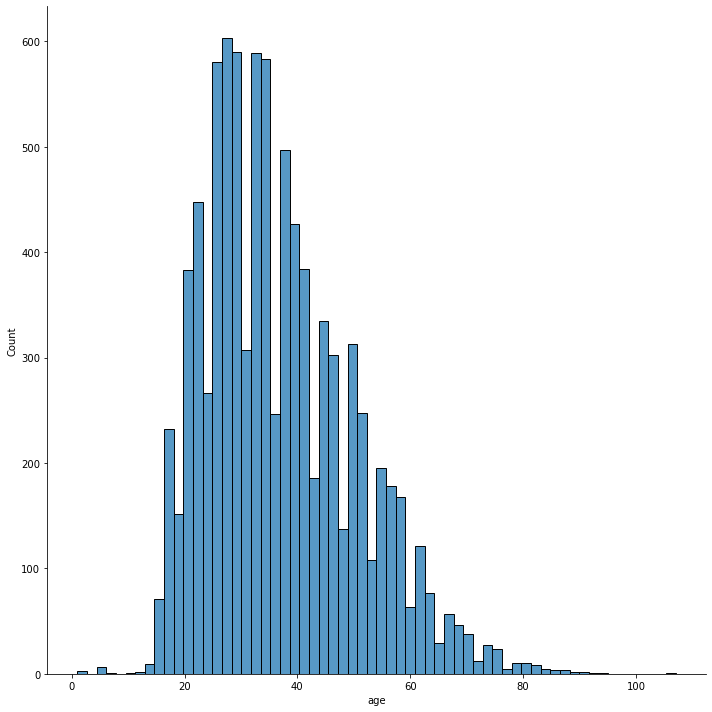

In [4]:
sns.displot(data=df, x='age',height=10)
plt.show()

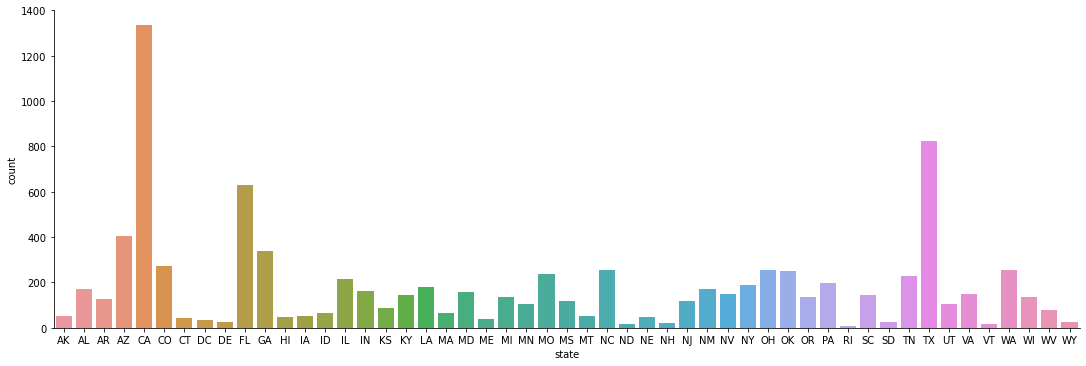

In [5]:
sns.catplot(data=df.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
plt.show()

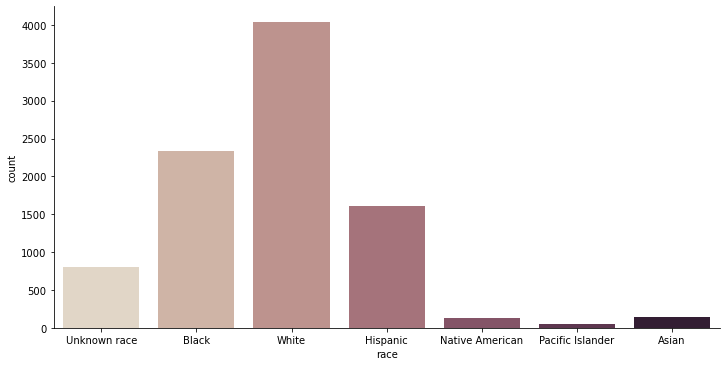

In [6]:
sns.catplot(data=df, x='race', kind="count", palette="ch:.25", height=5, aspect=2)
plt.show()


In [7]:
date_list = df['date_of_incident'].to_list()
date_map = dict()
for date in date_list:
    year = date.split('/')[2]
    if year in date_map:
        date_map[year] += 1
    else:
        date_map[year] = 1

date_map

# d = {'col1': [1, 2], 'col2': [3, 4]}

{'2021': 672,
 '2020': 1000,
 '2019': 1065,
 '2018': 1066,
 '2017': 1051,
 '2016': 1057,
 '2015': 1096,
 '2014': 1024,
 '2013': 1065}

In [8]:
df_date = pd.DataFrame(data=date_map, columns=['year', 'count'])

df_date['year'] = date_map.keys()
df_date['count'] = date_map.values()
df_date

,year,count
0,2021,672
1,2020,1000
2,2019,1065
3,2018,1066
4,2017,1051
5,2016,1057
6,2015,1096
7,2014,1024
8,2013,1065


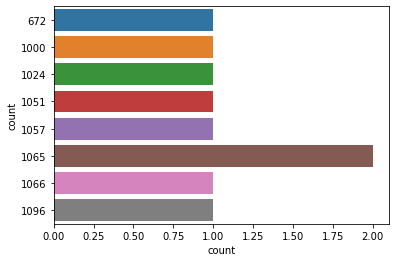

In [14]:
sns.countplot(y='count', data=df_date)
plt.show()

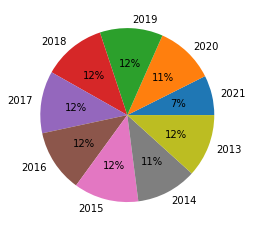

In [15]:
plt.pie(x=df_date['count'], labels=df_date['year'], autopct='%.0f%%')
plt.show()

In [16]:
df['alleged_weapon'].value_counts()

gun                   4819
knife                 1170
none                   914
undetermined           600
vehicle                513
                      ... 
gun and knives           1
railroad spike           1
contractor's level       1
metal bar                1
hand torch               1
Name: alleged_weapon, Length: 181, dtype: int64